In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
data = pd.read_csv("D:\大四下\ML\HW1\HW1.csv")

In [3]:
data.pop('Unnamed: 2')
data.pop('Unnamed: 3')

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
65   NaN
66   NaN
67   NaN
68   NaN
69   NaN
Name: Unnamed: 3, Length: 70, dtype: float64

In [4]:
data = data.to_numpy()

In [5]:
training = data[:50]
testing = data[50:]

### Part I. Linear Regression

In [6]:
def sigmoid(x):
    z = np.exp(-x)
    sig = 1 / (1 + z)

    return sig

In [7]:
def basis(x, j, M):
    if j == 0:
        return 1
    else:
        u = 3 * j / M
        s = 0.1
        return sigmoid((x - u) / s)

In [8]:
def design_matrix(x, M):
    phi = np.zeros((len(x), M))
    for i in range(len(x)):
        for j in range(M):
            phi[i][j] = basis(x[i], j, M)
    return phi

In [11]:
def find_coeff(x, t, phi):
    #w = (phi^T * phi) ^ -1 * phi^T * t
    w = np.linalg.inv(np.dot(np.transpose(phi), phi))
    w = np.dot(np.dot(w, np.transpose(phi)), t)
    return w

In [12]:
training_x = training[:, 0]
training_t = training[:, 1]

In [13]:
testing_x = testing[:, 0]
testing_t = testing[:, 1]

In [14]:
testing_x

array([1.94220061, 1.3777594 , 0.08140371, 1.6440502 , 0.29778041,
       2.04832606, 1.87218842, 1.08232578, 2.12358592, 0.447498  ,
       2.99801586, 2.19420936, 1.83376025, 1.00091276, 0.90870437,
       1.88322959, 2.41449629, 2.51695888, 0.09424515, 2.71192587])

1_1

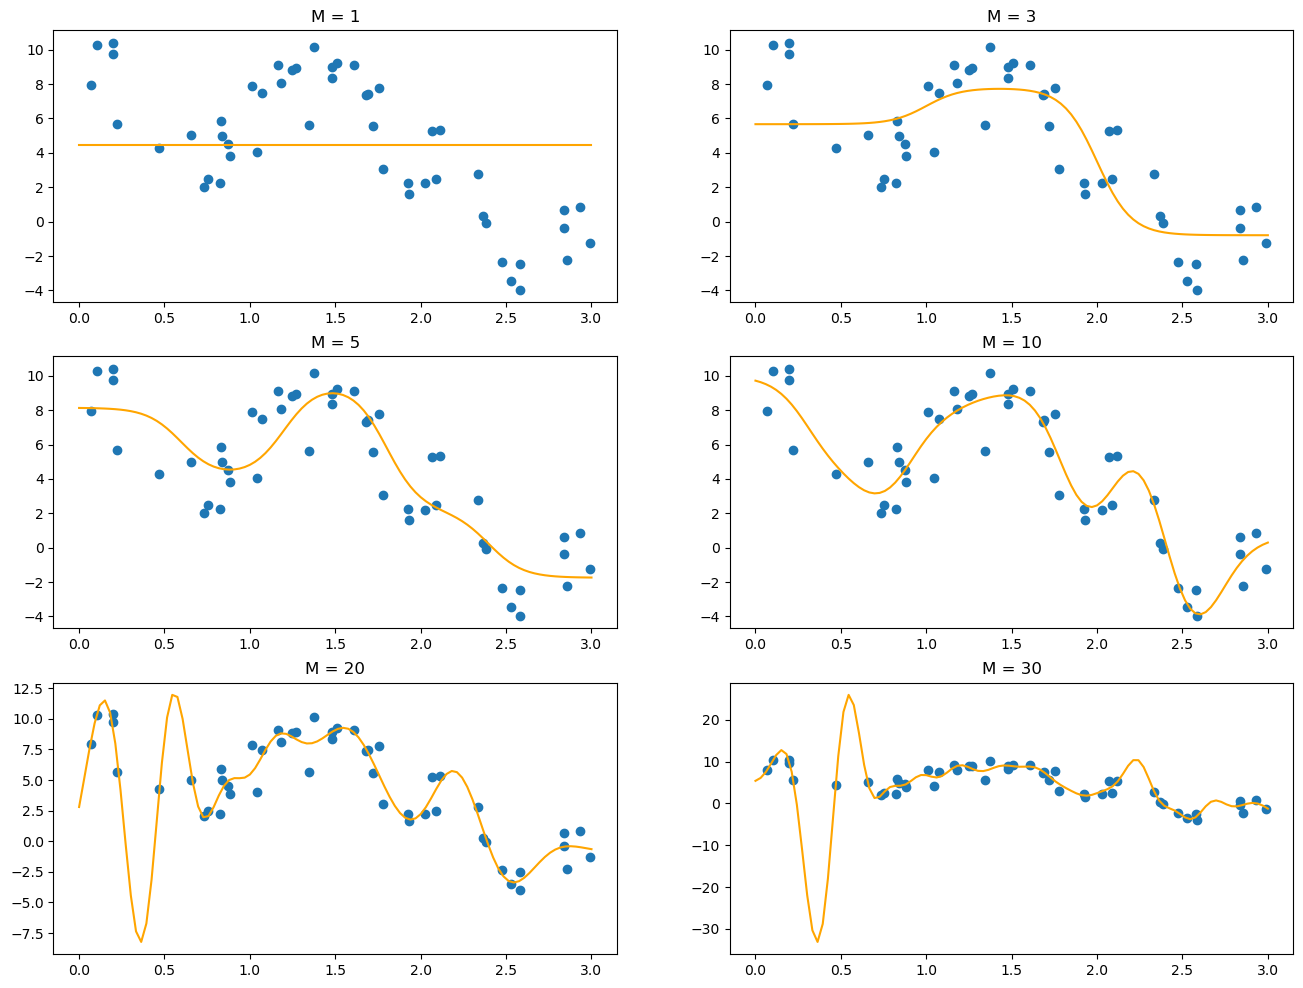

In [15]:
#recording the value
x_val = []
for num in range(31):
    x_val.append(num / 10)
x_val = np.array(x_val)
    
M = [1, 3, 5, 10, 20, 30]
rows = 3
columns = 2
fig = plt.figure(figsize=(16, 12))

record_mat = []

for i in range(len(M)):
    phi = design_matrix(training_x, M[i])
    w = find_coeff(training_x, training_t, phi)
    phi_test = design_matrix(np.linspace(0.0, 3.0, num=100), M[i])
    record = design_matrix(x_val, M[i])
    y = np.dot(phi_test, w)
    record_y = np.dot(record, w)
    fig.add_subplot(rows, columns, i + 1)
    plt.scatter(training_x, training_t, marker = 'o');
    plt.plot(np.linspace(0.0, 3.0, num=100), y, color = 'orange');
    plt.title("M = " + str(M[i]))
    record_mat.append(record_y)

In [16]:
with open('part1_1.csv', 'w') as f:
    
    # Create a CSV writer object that will write to the file 'f'
    csv_writer = csv.writer(f)
    
    for cols in record_mat:
        temp = []
        for col in cols:
            # Write the field names (column headers) to the first row of the CSV file
            temp.append(col)
        csv_writer.writerow(temp)

1_2

In [17]:
def error(predict, label):
    MSE = 0
    for i in range(len(label)):
        MSE += (predict[i] - label[i]) ** 2
    MSE *= (1 / 2)
    return MSE

Text(0.5, 1.0, 'MSE evaluate')

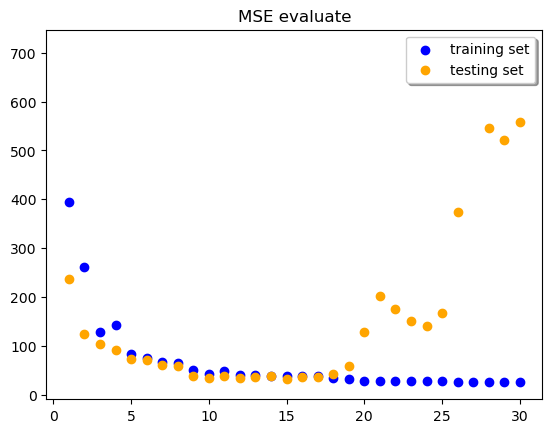

In [18]:
training_list = []
testing_list = []
#we already obtain w(param.)
for M in range(1, 31):
    #training set
    phi = design_matrix(training_x, M)
    w = find_coeff(training_x, training_t, phi)
    phi_train = design_matrix(training_x, M)
    y = np.dot(phi_train, w)
    MSE_train = error(y, training_t)
    
    #testing set
    phi_test = design_matrix(testing_x, M)
    y_test = np.dot(phi_test, w)
    MSE_test = error(y_test, testing_t)
    
    training_list.append(MSE_train)
    testing_list.append(MSE_test)
    
#plot
fig , ax = plt.subplots()
plt.scatter(np.linspace(1, 30, num=30), training_list, color = 'blue', label = "training set")
plt.scatter(np.linspace(1, 30, num=30), testing_list, color = 'orange', label = "testing set")
ax.legend(loc = 'upper right', shadow = True) 
plt.title("MSE evalu ate")

1_3

In [64]:
K = 5
num = int(len(training) / 5)
compare = []
for M in range(1, 30):
    MSE_test = 0
    #iterate K-fold
    for k in range(K):
        dup_x = list(training_x)
        dup_t = list(training_t)
        fold_test_x = dup_x[k * num: k * num + 10]
        fold_test_t = dup_t[k * num: k * num + 10]
        del dup_x[k * num: k * num + 10]
        del dup_t[k * num: k * num + 10]
        dup_x = np.array(dup_x)
        dup_t = np.array(dup_t)
        fold_test_x = np.array(fold_test_x)
        fold_test_t = np.array(fold_test_t)
        #training set
        phi = design_matrix(dup_x, M)
        w = find_coeff(dup_x, dup_t, phi)

        #testing set
        phi_test = design_matrix(fold_test_x, M)
        y_test = np.dot(phi_test, w)
        MSE_test += error(y_test, fold_test_t)
        
    compare.append(MSE_test / K)

In [65]:
best_M = compare.index(min(compare))
best_M

8

MSE for testset: 59.4112150301773


Text(0.5, 1.0, '5-fold-cross-validation - testing data')

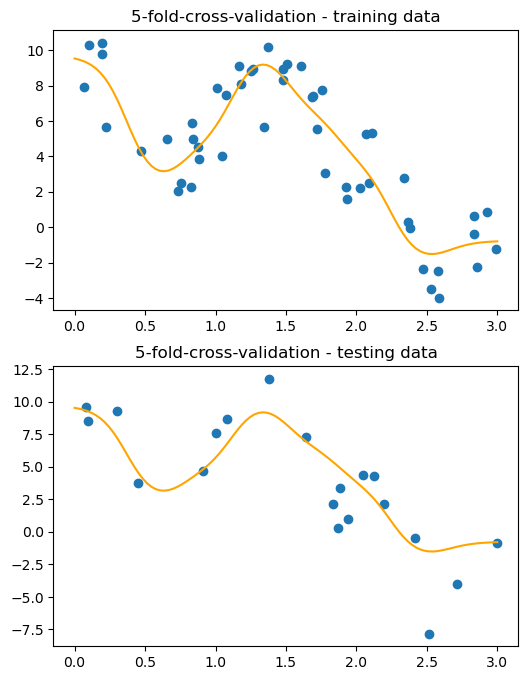

In [63]:
fig = plt.figure(figsize=(6, 8))

x_val = []
for num in range(31):
    x_val.append(num / 10)
x_val = np.array(x_val)
store_y = []

phi = design_matrix(training_x, best_M)
w = find_coeff(training_x, training_t, phi)
phi_test = design_matrix(np.linspace(0.0, 3.0, num=100), best_M)
store_x = design_matrix(x_val, best_M)
y = np.dot(phi_test, w)
store_y = np.dot(store_x, w)

#evaluate of testing set
phi_test = design_matrix(testing_x, best_M)
y_test = np.dot(phi_test, w)
MSE_test = error(y_test, testing_t)
print("MSE for testset:", MSE_test)

#plot
fig.add_subplot(211)
plt.scatter(training_x, training_t, marker = 'o');
plt.plot(np.linspace(0.0, 3.0, num=100), y, color = 'orange');
plt.title("5-fold-cross-validation - training data")

fig.add_subplot(212)
plt.scatter(testing_x, testing_t, marker = 'o');
plt.plot(np.linspace(0.0, 3.0, num=100), y, color = 'orange');
plt.title("5-fold-cross-validation - testing data")

In [60]:
with open('part1_3.csv', 'w') as f:
    
    # Create a CSV writer object that will write to the file 'f'
    csv_writer = csv.writer(f)
    
    csv_writer.writerow(store_y)

In [55]:
store_y

array([ 5.66301753,  5.66318225,  5.6636299 ,  5.66484576,  5.66814375,
        5.67705673,  5.70090786,  5.76308275,  5.91466837,  6.23087939,
        6.71871215,  7.20612239,  7.52060731,  7.66729217,  7.71609583,
        7.70378193,  7.61590665,  7.36689213,  6.75294184,  5.47005328,
        3.48992668,  1.50969594,  0.22638196, -0.38877621, -0.64108631,
       -0.73787512, -0.77404425, -0.78742757, -0.79236157, -0.79417812,
       -0.79484659])

**1_4**

In [24]:
def error_reg(predict, label, w, L):
    MSE = 0
    temp = 0
    for i in range(len(label)):
        MSE += (predict[i] - label[i]) ** 2
    MSE *= (1 / 2)
    for i in range(len(w)):
        temp += w[i] ** 2
    MSE += (L / 2) * temp
    return MSE

In [25]:
def find_coeff_reg(x, t, phi, L):
    #w = (lambda * I + phi^T * phi) ^ -1 * phi^T * t
    w = np.linalg.inv(np.dot(np.transpose(phi), phi) + L * np.identity(len(np.transpose(phi))))
    w = np.dot(np.dot(w, np.transpose(phi)), t)
    return w

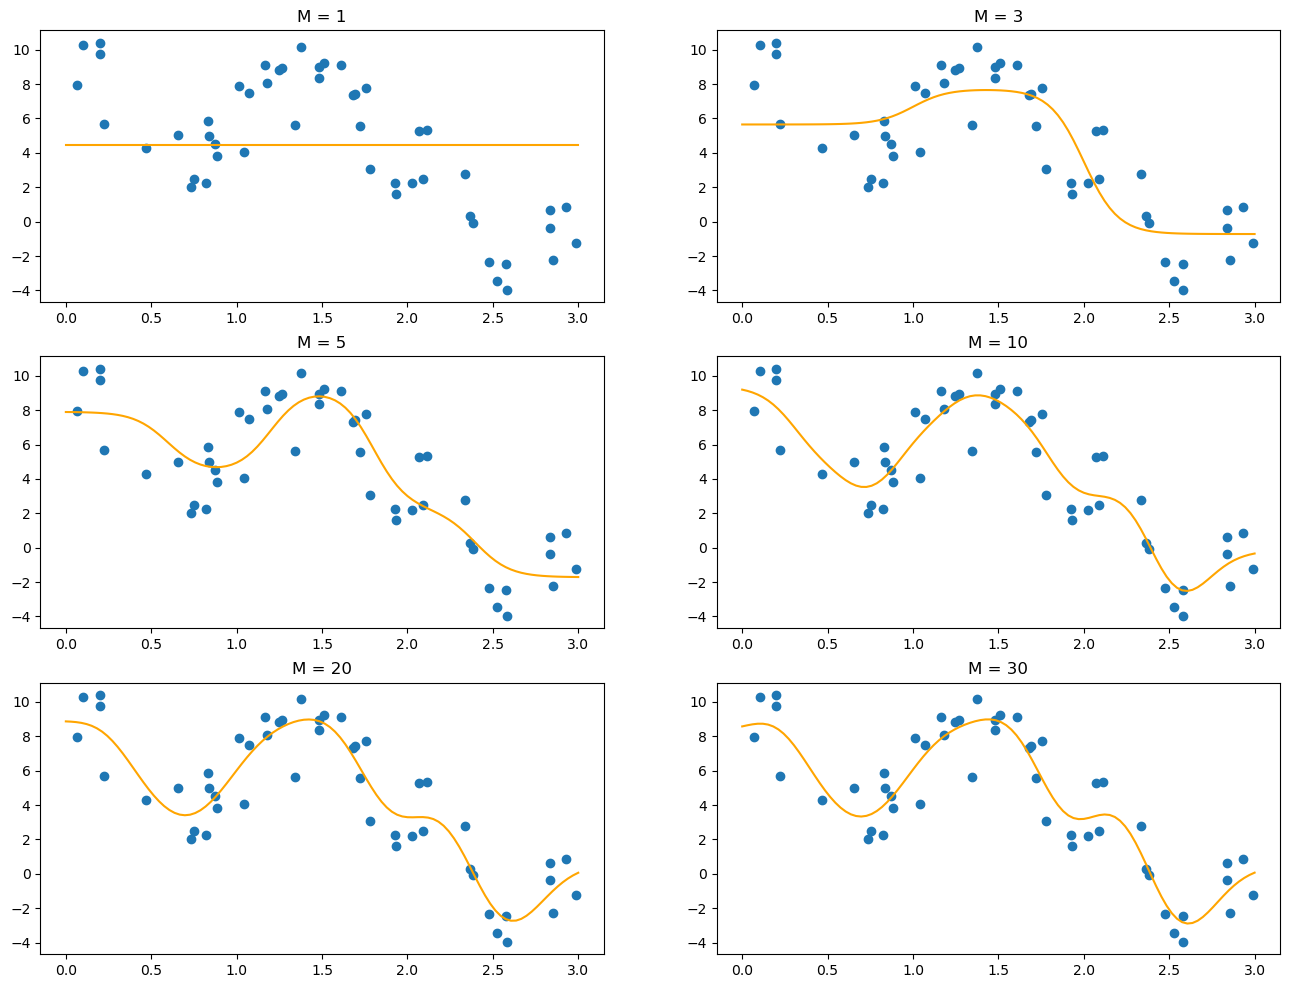

In [26]:
M = [1, 3, 5, 10, 20, 30]
L = 1 / 10
rows = 3
columns = 2
record_mat = []
#recording the value
x_val = []
for num in range(31):
    x_val.append(num / 10)
x_val = np.array(x_val)

fig = plt.figure(figsize=(16, 12))

for i in range(len(M)):
    phi = design_matrix(training_x, M[i])
    w = find_coeff_reg(training_x, training_t, phi, L)
    phi_test = design_matrix(np.linspace(0.0, 3.0, num=100), M[i])
    record_test = design_matrix(x_val, M[i])
    y = np.dot(phi_test, w)
    record_y = np.dot(record_test, w)
    fig.add_subplot(rows, columns, i + 1)
    plt.scatter(training_x, training_t, marker = 'o');
    plt.plot(np.linspace(0.0, 3.0, num=100), y, color = 'orange');
    plt.title("M = " + str(M[i]))
    record_mat.append(record_y)

In [27]:
with open('part1_4.csv', 'w') as f:
    
    # Create a CSV writer object that will write to the file 'f'
    csv_writer = csv.writer(f)
    
    for cols in record_mat:
        temp = []
        for col in cols:
            # Write the field names (column headers) to the first row of the CSV file
            temp.append(col)
        csv_writer.writerow(temp)

Text(0.5, 1.0, 'MSE evaluate')

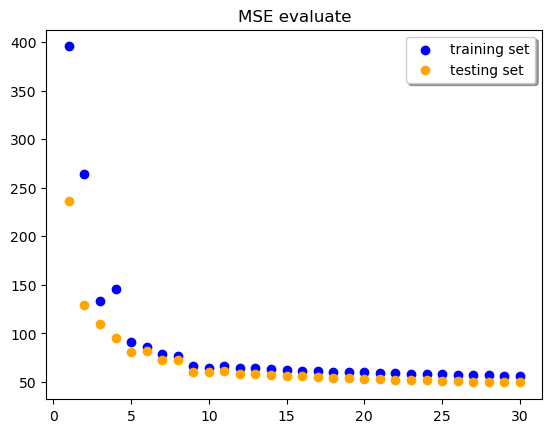

In [22]:
training_list = []
testing_list = []
#L for lambda
L = 1 / 10
#we already obtain w(param.)
for M in range(1, 31):
    #training set
    phi = design_matrix(training_x, M)
    w = find_coeff_reg(training_x, training_t, phi, L)
    phi_train = design_matrix(training_x, M)
    y = np.dot(phi_train, w)
    MSE_train = error_reg(y, training_t, w, L)
    
    #testing set
    phi_test = design_matrix(testing_x, M)
    y_test = np.dot(phi_test, w)
    MSE_test = error_reg(y_test, testing_t, w, L)
    
    training_list.append(MSE_train)
    testing_list.append(MSE_test)
    
#plot
fig , ax = plt.subplots()
plt.scatter(np.linspace(1, 30, num=30), training_list, color = 'blue', label = "training set")
plt.scatter(np.linspace(1, 30, num=30), testing_list, color = 'orange', label = "testing set")
ax.legend(loc = 'upper right', shadow = True) 
plt.title("MSE evaluate")

In [93]:
print(training_list.index(min(training_list)))
print(training_list.index(min(training_list)))

29
29


In [96]:
print("min MSE of testset:", min(training_list))

min MSE of testset: 56.37792852453989


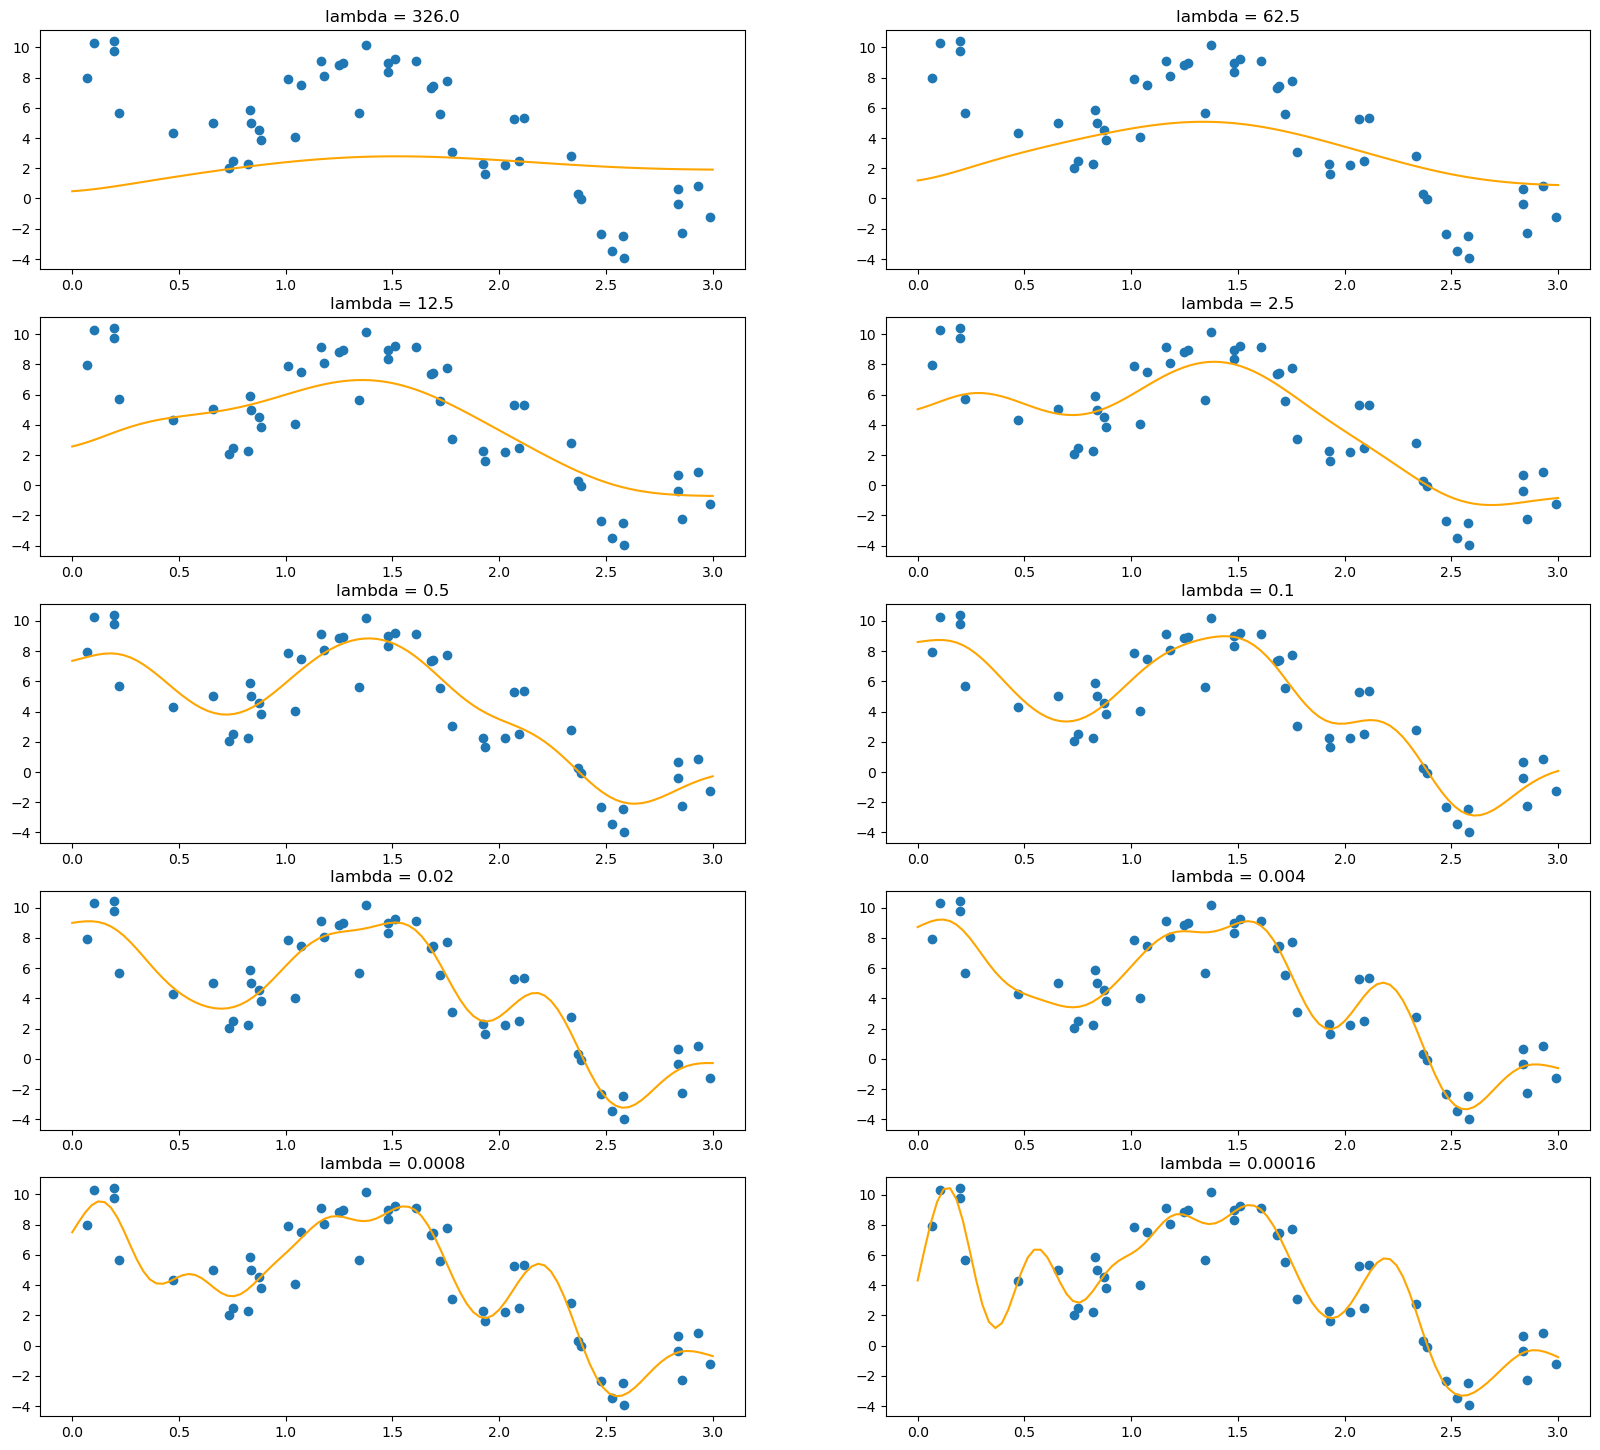

In [24]:
M = 29
L = [652/2, 125/2, 25/2, 5/2, 1/2, 1/10, 1/50, 1/250, 1/1250, 1/6250]
rows = 5
columns = 2
fig = plt.figure(figsize=(20, 18))

for i in range(len(L)):
    phi = design_matrix(training_x, M)
    w = find_coeff_reg(training_x, training_t, phi, L[i])
    phi_test = design_matrix(np.linspace(0.0, 3.0, num=100), M)
    y = np.dot(phi_test, w)
    fig.add_subplot(rows, columns, i + 1)
    plt.scatter(training_x, training_t, marker = 'o');
    plt.plot(np.linspace(0.0, 3.0, num=100), y, color = 'orange');
    plt.title("lambda = " + str(L[i]))

### Part II. Bayesian Linear Regression

In [25]:
from numpy.random import multivariate_normal as normal

In [26]:
#normalize
dataX = (training_x - training_x.min(axis=0))/(training_x.max(axis=0)-training_x.min(axis=0))
dataT = (training_t - training_t.min(axis=0))/(training_t.max(axis=0)-training_t.min(axis=0))

In [27]:
def S_N(M, beta, S_0):
    ans_inv = np.linalg.inv(S_0)  + beta * np.dot(np.transpose(design_matrix(x, M)), design_matrix(x, M))
    #print(np.dot(np.transpose(design_matrix(x, M)), design_matrix(x, M)))
    ans = np.linalg.inv(ans_inv)
    return ans

In [28]:
def m_N(x, M, t, beta, S_0, m_0):
    ans = np.dot(S_N(M, beta, S_0), (np.dot(np.linalg.inv(S_0), m_0) + np.array(beta * np.dot(np.transpose(design_matrix(x, M)), t)).reshape(10, 1)))
    '''#10, 10
    print("a:", S_N(M, beta, S_0).shape)
    #10, 1
    print("b:", np.dot(np.linalg.inv(S_0), m_0).shape)
    print("d:", np.array(beta * np.dot(np.transpose(design_matrix(x, M)), t)).shape)'''
    
    return ans

In [107]:
def phi(x, M):
    phi = np.zeros((M))
    for j in range(M):
        phi[j] = basis(x, j, M)
    return np.transpose(phi)

In [30]:
def dev(beta, x, M, S_0):
    var = 1/beta + np.dot(np.dot(np.transpose(phi(x, M)), S_N(M, beta, S_0)), phi(x, M))
    standard_dev = var ** (1/2)
    return standard_dev

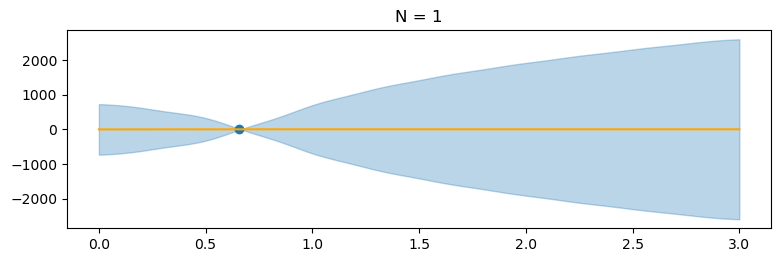

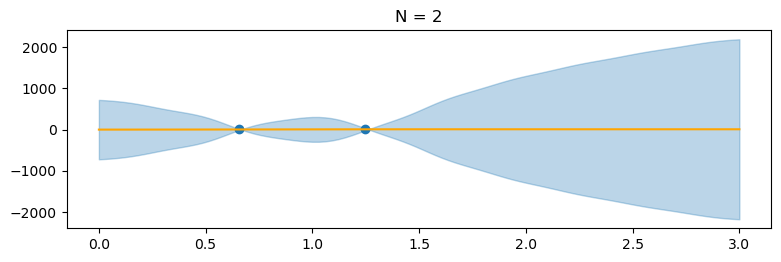

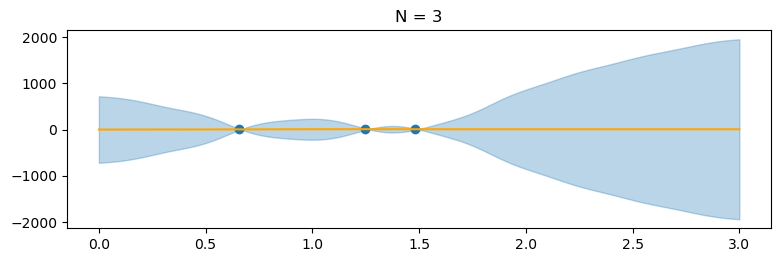

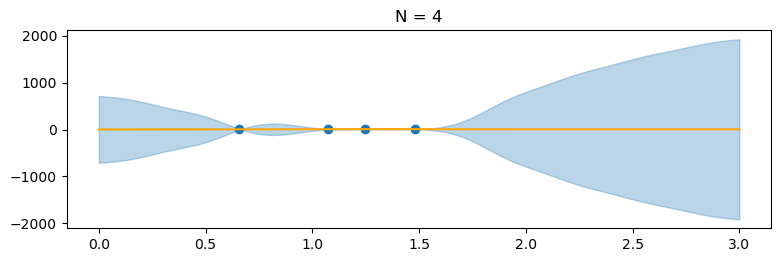

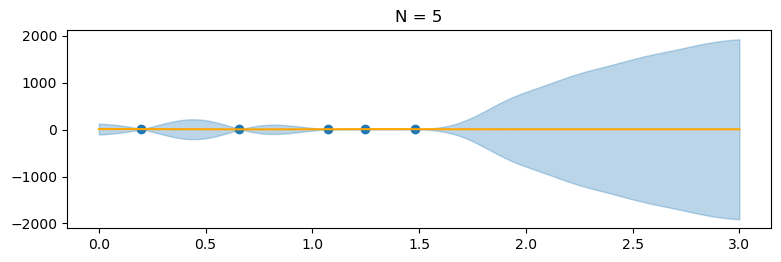

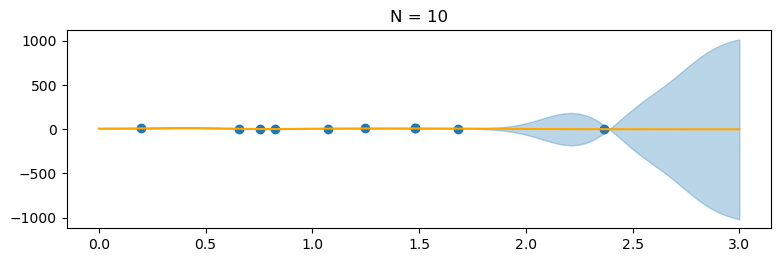

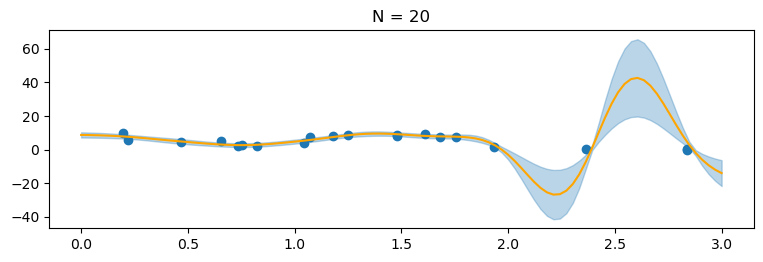

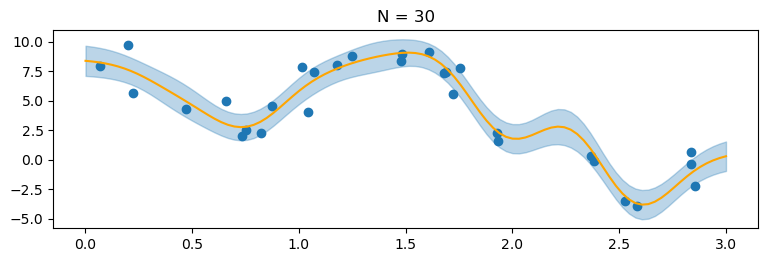

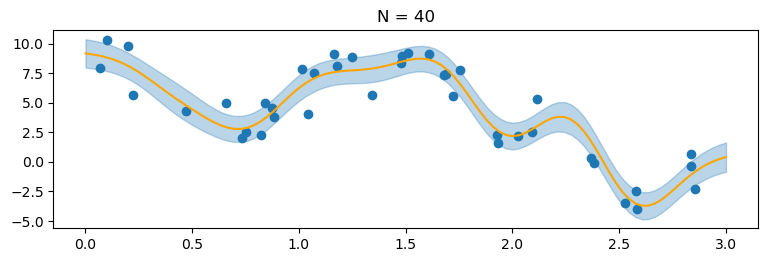

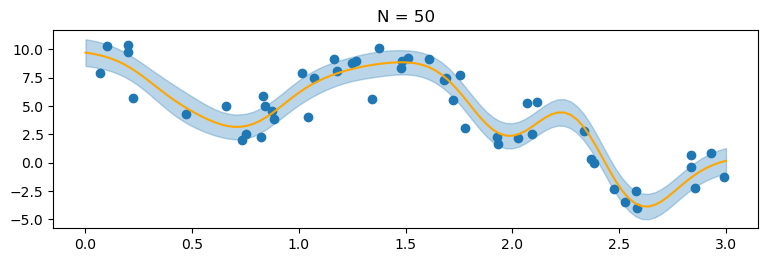

In [32]:
data_num = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
M = 10
beta = 1
S_0 = (10 ** -6) ** -1 * np.identity(M)
m_0 = np.zeros((M, 1))


rows = 6
columns = 2
for num in range(len(data_num)):
    x = training_x[:data_num[num]]
    t = training_t[:data_num[num]]

    var = S_N(M, beta, S_0)
    mean = m_N(x, M, t, beta, S_0, m_0)

    y = []
    upper = []
    under = []
    
    for i in range(0, 300, 3):
        point = np.dot(np.transpose(mean), phi(i / 100, M))
        y.append(point)
        upper.append(point + dev(beta, i / 100, M, S_0))
        under.append(point - dev(beta, i / 100, M, S_0))
        
        
    fig = plt.figure(figsize = (20, 18))
    fig.add_subplot(rows, columns, num + 1)
    plt.scatter(x, t, marker = 'o')
    #plt.ylim([-50, 50])
    plt.plot(np.linspace(0.0, 3.0, num=100), y, color = 'orange')
    plt.fill_between(np.linspace(0.0, 3.0, num=100), np.reshape(np.asarray(upper), len(upper)), np.reshape(np.asarray(under), len(under)), alpha = 0.3, color = 'C0')
    plt.title("N = " + str(data_num[num]))
    